In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from investigation_functions import ml_visualisation_funcs as mvf

In [3]:
df_svm_4q = pd.read_csv('../ML_results/SVM/svm_4q.csv')
df_svm_8q = pd.read_csv('../ML_results/SVM/svm_8q.csv')
df_svm_16q = pd.read_csv('../ML_results/SVM/svm_16q_bvb.csv')

select the backend v backend tests

In [5]:
df_svm_4q = df_svm_4q[df_svm_4q['machines'] != 1111]
df_svm_8q = df_svm_8q[df_svm_8q['machines'] != 1111]

NB! backend order of ones is ['torino', 'brisbane', 'fez', 'marrakesh']

## bris vs others/all (bva)

select brisbane and others:

- bris-tor = 1100
- bris-fez = 0110
- bris-marr = 0101

In [6]:
bva = [1100, 110, 101] #delete leading zeros
df_svm_4q_bva = df_svm_4q[df_svm_4q['machines'].isin(bva)]
df_svm_8q_bva = df_svm_8q[df_svm_8q['machines'].isin(bva)]
df_svm_16q_bva = df_svm_16q[df_svm_16q['machines'].isin(bva)]

make easyish to plot

In [8]:
df_svm_4q_bva_p = mvf.make_easy2plot(df_svm_4q_bva,False,False)
df_svm_8q_bva_p = mvf.make_easy2plot(df_svm_8q_bva,False,False)

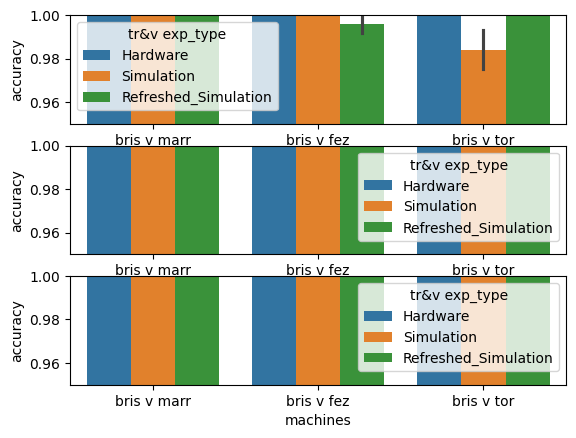

In [9]:
plt.subplot(311)
ax_bva_4qs =sns.barplot(
    df_svm_4q_bva_p, x = 'machines', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_bva_4qs.set_ylim(tuple([0.95,1]))
ax_bva_4qs.set_xticks(ticks = np.arange(0,3),labels=["bris v marr","bris v fez", "bris v tor"])

plt.subplot(312)
ax_bva_8qs=sns.barplot(
    df_svm_8q_bva_p, x = 'machines', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_bva_8qs.set_ylim(tuple([0.95,1]))
ax_bva_8qs.set_xticks(ticks = np.arange(0,3),labels=["bris v marr","bris v fez", "bris v tor"])

plt.subplot(313)
ax_bva_8qs=sns.barplot(
    df_svm_16q_bva, x = 'machines', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_bva_8qs.set_ylim(tuple([0.95,1]))
ax_bva_8qs.set_xticks(ticks = np.arange(0,3),labels=["bris v marr","bris v fez", "bris v tor"])

plt.show()

### Observations
For 8 and 16 qubits it is 100% accurate always

For 4 qubits, accuracy is only lost between brisbane and fez (~1%) in the refreshed simulation run, and bribane and torino (~2%) in the Simulation run which is strange. Maybe they have similar architecture and the calibration techniques have change in the time between the Sim snapshot and the Refreshed snapshot.

# herons v herons

- tor v marr v fez = 1011
- tor v fez = 1010
- tor v marr = 1001
- fez v marr = 0011

In [10]:
hvh = [11, 1001, 1010, 1011] #delete leading zeros, ascending order
labels_hvh = ["fez v marr", "tor v marr"," tor v fez","tor,marr,fez"]

df_svm_4q_hvh = df_svm_4q[df_svm_4q['machines'].isin(hvh)]
df_svm_8q_hvh = df_svm_8q[df_svm_8q['machines'].isin(hvh)]
df_svm_16q_hvh = df_svm_16q[df_svm_16q['machines'].isin(hvh)]

In [11]:
df_svm_4q_hvh_p = mvf.make_easy2plot(df_svm_4q_hvh,False,False)
df_svm_8q_hvh_p = mvf.make_easy2plot(df_svm_8q_hvh,False,False)

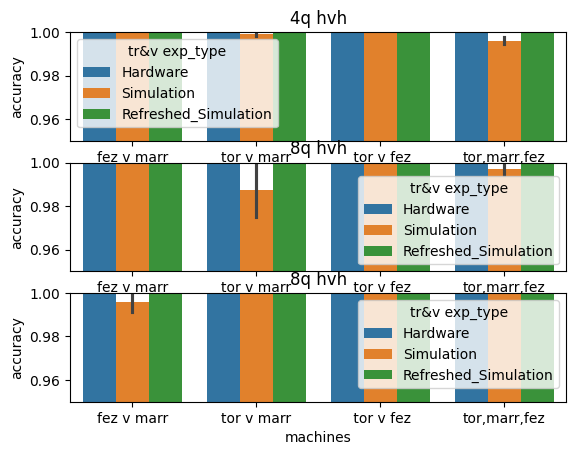

In [12]:
plt.subplot(311)
ax_hvh_4qs =sns.barplot(
    df_svm_4q_hvh_p, x = 'machines', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_hvh_4qs.set_ylim(tuple([0.95,1]))
ax_hvh_4qs.set_xticks(ticks = np.arange(0,4),labels=labels_hvh)
ax_hvh_4qs.set_title("4q hvh")

plt.subplot(312)
ax_hvh_8qs=sns.barplot(
    df_svm_8q_hvh_p, x = 'machines', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_hvh_8qs.set_ylim(tuple([0.95,1]))
ax_hvh_8qs.set_xticks(ticks = np.arange(0,4),labels=labels_hvh)
ax_hvh_8qs.set_title("8q hvh")

plt.subplot(313)
ax_hvh_8qs=sns.barplot(
    df_svm_16q_hvh, x = 'machines', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_hvh_8qs.set_ylim(tuple([0.95,1]))
ax_hvh_8qs.set_xticks(ticks = np.arange(0,4),labels=labels_hvh)
ax_hvh_8qs.set_title("8q hvh")

plt.show()

### Observations

Honestly the differences from 100% are so small they are pretty much negligible. Weird that its always the simulation the drops in accuracy.
For 4q and 8q it seems that torino and marrakesh are similar, but with 16q it seems that fez and marrakesh are similar. It might be that the specific quibits used in torino and marrakesh for 4 and 8q have a similar noise profile, but 16q is more generalised so the similarity of fez and marrakesh pops up.

----------------------------------------------------------
Torino and fez, and Marrakesh and Fez are always 100% accurate. But when Torino and Marrakesh are compared, the accuracy decreases. THis sort of indicates that Torino and Marrakesh may have a closer noise profile to each other than to  Fez. This is interesting because we expected that Fez and Marrakesh would actually be closer because they are both Heron r2 chips. 

In this comparison, the 4q runs actually have higher accuracy than the 8 qubit runs, which is different to the comparisons with brisbane.

Interestingly, it is always the simulated tests which show the drop in accuracy whereas the Hardware and Refreshed SImulation show no change in accuracy

# **** look into .Figure.add_subplot